In [1]:

%matplotlib inline


In [1]:
!pip3 install matplotlib

In [14]:
!pip3 install utils

In [15]:

import QuantLib as ql
import utils
%matplotlib inline
import matplotlib.pyplot as plt

In [83]:
maturity_date = ql.Date(29, 11, 2024)
spot_price = 10179
strike_price = 9623
volatility = 0.1746 # the historical vols for a year
dividend_rate = 0.0096
option_type = ql.Option.Call
risk_free_rate = 0.01322
day_count = ql.Actual365Fixed()
calendar = ql.SouthKorea()
calculation_date = ql.Date(21, 12, 2020)
ql.Settings.instance().evaluationDate = calculation_date

In [84]:
# payoff = ql.PlainVanillaPayoff(option_type, strike_price)
# exercise = ql.EuropeanExercise(maturity_date)
# european_option = ql.VanillaOption(payoff, exercise)

In [85]:
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
settlement = calculation_date
am_exercise = ql.AmericanExercise(settlement, maturity_date)
american_option = ql.VanillaOption(payoff, am_exercise)

In [86]:
def binomial_price(option, bsm_process, steps):
    binomial_engine = ql.BinomialVanillaEngine(bsm_process, "crr", steps)
    option.setPricingEngine(binomial_engine)
    return option.NPV()

In [87]:
spot_handle = ql.QuoteHandle(ql.SimpleQuote(spot_price))

In [88]:
flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date,risk_free_rate,day_count))

In [89]:
dividend_yield = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date,dividend_rate,day_count))

In [90]:
flat_vol_ts = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(calculation_date,calendar,volatility,day_count))

In [91]:
bsm_process = ql.BlackScholesMertonProcess(spot_handle, dividend_yield, flat_ts, flat_vol_ts)

In [92]:
steps = range(2, 200, 1)
# prices = [binomial_price(american_option, bsm_process, step) for step in steps]
prices = [binomial_price(european_option, bsm_process, step) for step in steps]

In [93]:
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
exercise = ql.EuropeanExercise(maturity_date)
european_option = ql.VanillaOption(payoff, exercise)

In [ ]:
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
settlement = calculation_date
am_exercise = ql.AmericanExercise(settlement, maturity_date)
american_option = ql.VanillaOption(payoff, am_exercise)

In [94]:
european_option.setPricingEngine(ql.AnalyticEuropeanEngine(bsm_process))
bs_price = european_option.NPV()
print("The theoretical price is %lf" % bs_price)

The theoretical price is 1662.739528


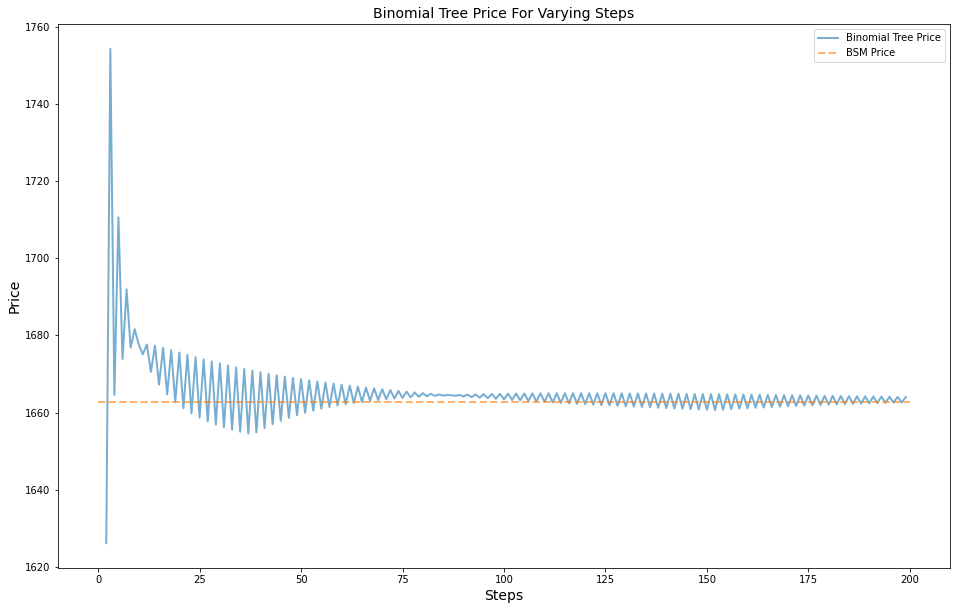

In [95]:
plt.figure(figsize=(16,10))
plt.plot(steps, prices, label="Binomial Tree Price", lw=2, alpha=0.6)
plt.plot([0,200],[bs_price, bs_price], "--", label="BSM Price", lw=2, alpha=0.6)
plt.xlabel("Steps", size=14)
plt.ylabel("Price", size=14)
plt.title("Binomial Tree Price For Varying Steps", size=14)
plt.legend()
plt.show()

In [27]:
plt.figure(figsize=(18,10))
steps.plot(color='k', lw=1., legend=True)
plt.plot(steps, prices, color='k', lw=0, marker='.', label='flat')
plt.plot([0,200],[bs_price, bs_price], "--", label="BSM Price", lw=2, alpha=0.6)

plt.axhline(y=0, lw=0.5, color='k')

AttributeError: 'range' object has no attribute 'plot'

<Figure size 1296x720 with 0 Axes>